In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [67]:
warnings.filterwarnings('ignore')  # In case there's any warning

sns.set_style('white')

### Exploratory Data Analysis

In [68]:
movie_info = pd.read_csv('Datasets/u.data', sep = '\t', header = None )

movie_info.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### Adding Legit coulmn names
As 0, 1, 2, 3 as column name makes no sense

In [69]:

columns_name = ['User_ID', 'Item_ID', 'Rating', 'Timestamp']

movie_info.columns = columns_name  #Explicitly defining column names

In [70]:

movie_info.head(5)


,User_ID,Item_ID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [71]:

movie_info.shape


(100000, 4)

In [72]:
# How many unique users are there?

movie_info.User_ID.nunique()


943

In [73]:
# Dataset holding Movie's name

movie_titles = pd.read_csv("Datasets/u.item", sep = '\|', header  = None)


In [74]:

movie_titles.head(5)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
# Amid of so many columns we are only required Item_ID & Titles i.e. 0 & 1

movie_titles = movie_titles[[0, 1]] #Item_ID, Title 
movie_titles.head(5)


,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Adding Legit column names to movie_titles

In [76]:

movie_titles.columns = ['Item_ID', 'Title']
movie_titles.head(5)


,Item_ID,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Combining movie_info and movie_titles

In [77]:

Movies = pd.merge(movie_info, movie_titles, on = 'Item_ID')

Movies.head()


,User_ID,Item_ID,Rating,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


#### Average Rating of each Movie

In [78]:

Avg_Rating = pd.DataFrame(Movies.groupby('Title').mean()['Rating'])
Avg_Rating.head()


,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [79]:
# Arranging Rating in Descending order

Avg_Rating.sort_values(by = 'Rating', ascending = False, inplace = True)
Avg_Rating.head(5)


,Rating
Title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [80]:
# Counting number of Ratings for each movie

Count_Rating = pd.DataFrame(Movies.groupby('Title').count()['Rating'])
Count_Rating.head()


,Rating
Title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


### Column name Rating should be replaced by Count 

In [81]:

Count_Rating.rename(columns = {'Rating' : 'Count'}, inplace = True)
Count_Rating.head()


,Count
Title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [82]:
# Reversing the order

Count_Rating.sort_values(by = 'Count', ascending = False, inplace = True)
Count_Rating.head()


,Count
Title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [83]:
Avg_Rating.head()

,Rating
Title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


#### Combining Count_Rating and Number of Avg_Rating

In [84]:
pd.merge(Avg_Rating, Count_Rating, on = 'Title').head()

,Rating,Count
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [85]:

Data = pd.merge(Avg_Rating, Count_Rating, on = 'Title')
Data.head()


,Rating,Count
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


### Data Visualization

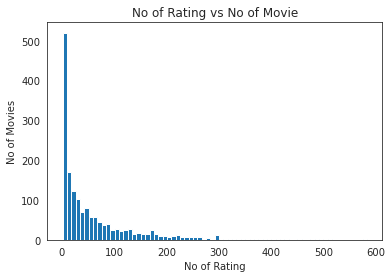

In [86]:

plt.hist(Data['Count'], bins = 70)
plt.ylabel("No of Movies")
plt.xlabel("No of Rating")
plt.title("No of Rating vs No of Movie")
plt.show()


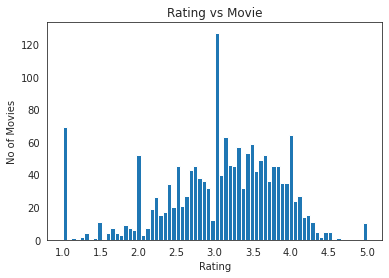

In [87]:

plt.hist(Data['Rating'], bins = 70)
plt.xlabel("Rating")
plt.ylabel("No of Movies")
plt.title("Rating vs Movie")
plt.show()


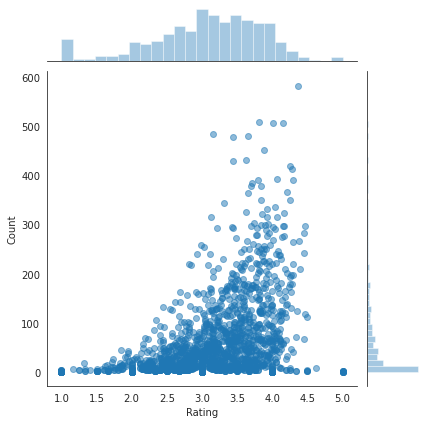

In [88]:
sns.jointplot(x = 'Rating', y = 'Count', data = Data, alpha = 0.5);

### Creating Movie Recommendation

In [89]:
Movies.head()

,User_ID,Item_ID,Rating,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


#### Mapping User_ID, Item_ID & Title all togehter

In [90]:

mapped = Movies.pivot_table(index = 'User_ID', columns = 'Title', values = 'Rating')
mapped.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [91]:
Data.sort_values('Count', ascending = False).head()

,Rating,Count
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


### Dealing with a single data : Star War 1977

In [94]:

starwars_user_rating = mapped['Star Wars (1977)']
starwars_user_rating.head()


User_ID
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

### Now Correlate Star Wars with rest of the movies 
Correlation means how the another movie is correalted to Star Wars in terms of User Rating, No of Ratings provided, etc.

In [96]:

similar_to_starwar = mapped.corrwith(starwars_user_rating)
similar_to_starwar.head()


Title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [98]:
# Creating a DataFrame out of Correlation
corr_starwars = pd.DataFrame(similar_to_starwar, columns = ["Correlation"])
corr_starwars.head(10)


,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


There are too many NaN values which aren't necessary so, better to drop them all.

In [100]:

corr_starwars.dropna(inplace = True)
corr_starwars.head(10)


,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [101]:

corr_starwars.sort_values('Correlation', ascending = False, inplace = True)


In [62]:
corr_starwars.head()

,Correlation
Title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


Filtering out those movies which are rated by few viewers


In [63]:
# Remember we have this:

Count_Rating.head()

,Count
Title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [64]:
corr_starwars  = pd.merge(corr_starwars, Count_Rating, on = 'Title')
corr_starwars.head()

,Correlation,Count
Title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5


In [65]:
corr_starwars[corr_starwars['Count'] > 100]

,Correlation,Count
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128
